# I-94 Traffic Visualisation

This is a guided project from dataquest.io

I will be visualising data on the westbound traffic on the I-94 Interstate highway between Minneapolis and Saint Paul. This datset was produced by John Hogue made it is available from the UCI Machine Learning Repository.

In [1]:
import pandas as pd
# create dataframe and print summary
traffic = pd.read_csv('data/Metro_Interstate_Traffic_Volume.csv')
print(traffic.head())
print(traffic.tail())
traffic.info()

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

## Traffic volume distribution

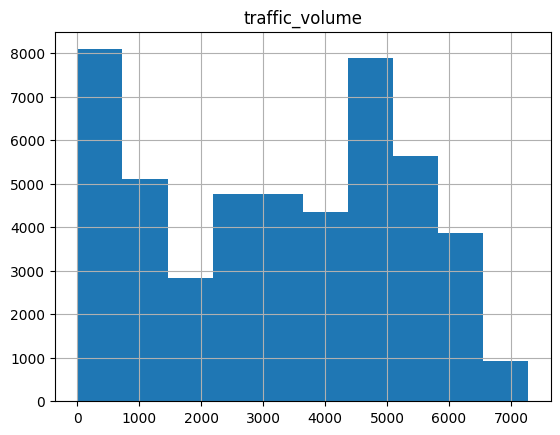

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
# exploratory analysis of traffic volume
traffic.hist('traffic_volume')
plt.show()
traffic['traffic_volume'].describe()

The `traffic_volume` column has an irregular distribution. The min is zero cars per hour and the max is 7,280. With a frequency of over 8,000, 500 cars per hour is the most common. However with a frequency of just under 8,000 the next most common is around 4,750 cars per hour.

Other factors such as time of day, weather and holidays will likely help to explain the volume.

## Time Factors

In [3]:
# covert datetime column
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
# split into day and night
traffic_day = traffic[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
traffic_day.info()
traffic_night = traffic[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
traffic_night.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.8+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24327 entries, 10 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------       

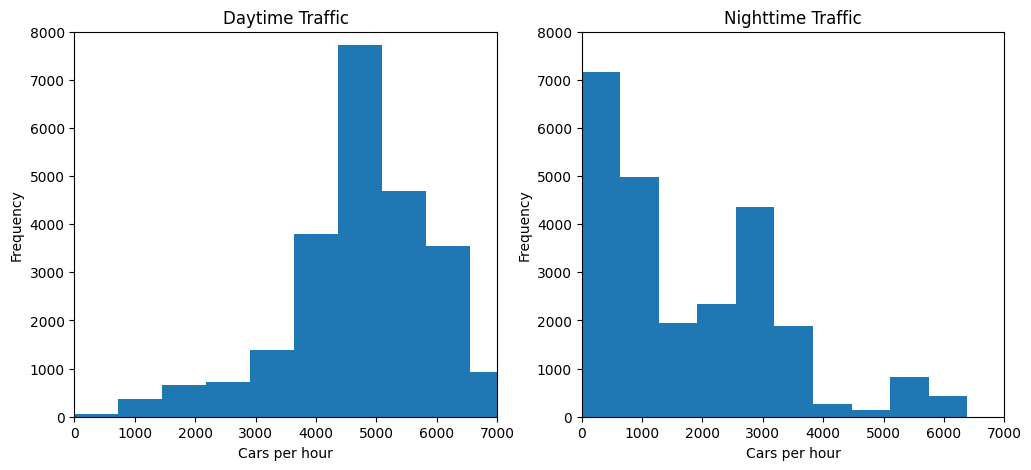

In [4]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(traffic_day['traffic_volume'])
plt.title('Daytime Traffic')
plt.xlabel('Cars per hour')
plt.ylabel('Frequency')
plt.xlim([0,7000])
plt.ylim([0,8000])
plt.subplot(1,2,2)
plt.hist(traffic_night['traffic_volume'])
plt.title('Nighttime Traffic')
plt.xlabel('Cars per hour')
plt.ylabel('Frequency')
plt.xlim([0,7000])
plt.ylim([0,8000])
plt.show()

In [5]:
print("Day Stats:")
print(traffic_day['traffic_volume'].describe())
print("\n")
print("Night Stats:")
print(traffic_night['traffic_volume'].describe())

Day Stats:
count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64


Night Stats:
count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


When comparing `traffic_volume` separately for day and night the different districtuions can be seen. The daytime has a rough normal distribution, with 4,820 cars per hour around 50% of the time. The nighttime has a rough right skewed distribtuion, with 1,287 cars per hour around 50% of the time. The night has some outliers showing irregular peaks at 3,000 and 5,500 cars per hour.

On the whole the day sees much more traffic. At night there at less than 2819 cars per hour 75% of the time. Whereas in the day the is around twice as many at 5,559.

Due to the reduced cars per hour and more irregular distribution, it may be worth disregarding the night data moving forward.

In [6]:
# get month
day = traffic_day
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

D:\TEMP\ipykernel_5380\1905019468.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['month'] = day['date_time'].dt.month
D:\TEMP\ipykernel_5380\1905019468.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_month = day.groupby('month').mean()


month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

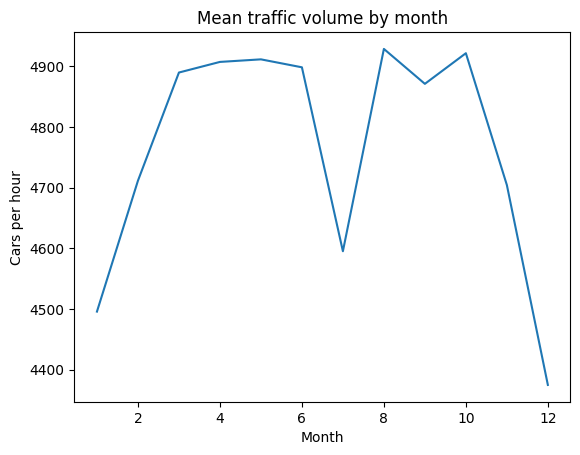

In [7]:
# plot traffic by month
plt.plot(by_month.index,by_month['traffic_volume'])
plt.title("Mean traffic volume by month")
plt.xlabel("Month")
plt.ylabel("Cars per hour")
plt.show()

This shows there is generally more traffic westbound on the I-94 in spring and summer than autumn and winter. The one exception is July, where traffic unexpectedly fell to the second lowest in the year.

In [8]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

D:\TEMP\ipykernel_5380\1778748283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['dayofweek'] = day['date_time'].dt.dayofweek
D:\TEMP\ipykernel_5380\1778748283.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_dayofweek = day.groupby('dayofweek').mean()


dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

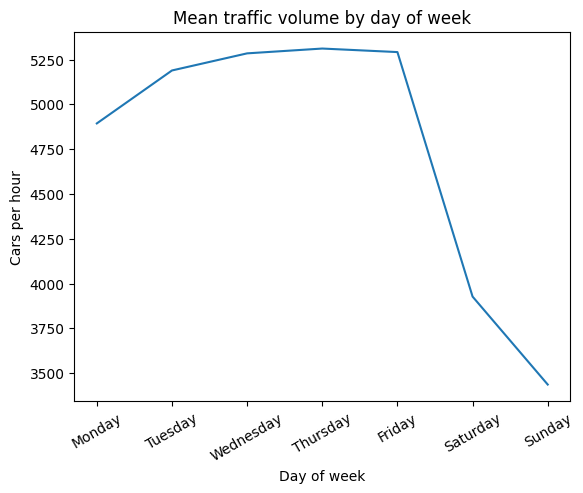

In [9]:
# plot traffic by day of the week
plt.plot(by_dayofweek.index,by_dayofweek['traffic_volume'])
plt.title("Mean traffic volume by day of week")
plt.xlabel("Day of week")
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],rotation=30)
plt.ylabel("Cars per hour")
plt.show()

Slight increase in traffic at the start of the week, when it begins to level off at around Wednesday. Significant decrease in traffic at the weekend, with Sunday seeing around 500 cars per hour less than Saturday. 

This shows the I-94 westbound is significantly busier on weekdays than weekends and is quietest on Sundays.

In [10]:
# split by hour
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


D:\TEMP\ipykernel_5380\4155244569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['hour'] = day['date_time'].dt.hour
D:\TEMP\ipykernel_5380\4155244569.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_hour_business = bussiness_days.groupby('hour').mean()
D:\TEMP\ipykernel_5380\4155244569.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_hour_weekend 

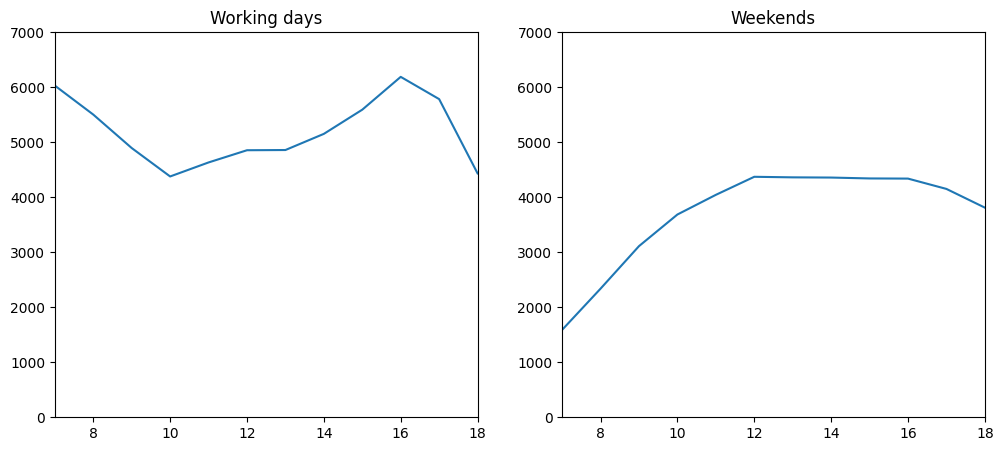

In [11]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(by_hour_business.index,by_hour_business['traffic_volume'])
plt.title("Working days")
plt.xlim([7,18])
plt.ylim([0,7000])
plt.subplot(1,2,2)
plt.plot(by_hour_weekend.index,by_hour_weekend['traffic_volume'])
plt.title("Weekends")
plt.xlim([7,18])
plt.ylim([0,7000])
plt.show()

The busiest times of day on working days are in the morning, 7am to 8am, and in the afternoon, 4pm to 5pm. This makes sense as these are typical "rush" hours.

The busiest times of days for weekends are the early afternoons, 12pm to 4pm.

### Time Factors Conclusion

To Summarise:

- More traffic is seen during the day than at night
- There is more traffic during summer/spring than autumn/winter (with the exception of July)
- Week days have significantly more traffic than weekends
- Traffic on week days is higher during the typical morning and afternoon rush hour periods
- Traffic on weekends is generally highest in the early afternoon

## Weather

In [12]:
# examine correlation of weather
traffic.corr()['traffic_volume']

D:\TEMP\ipykernel_5380\2504560413.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  traffic.corr()['traffic_volume']


temp              0.130299
rain_1h           0.004714
snow_1h           0.000733
clouds_all        0.067054
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

None of the weather columns seem to have a correlation on traffic volume. The strongest being 0.13 for weather, which is still very weak.

In [13]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

D:\TEMP\ipykernel_5380\2966152484.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_weather_main = day.groupby('weather_main').mean()
D:\TEMP\ipykernel_5380\2966152484.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_weather_description = day.groupby('weather_description').mean()


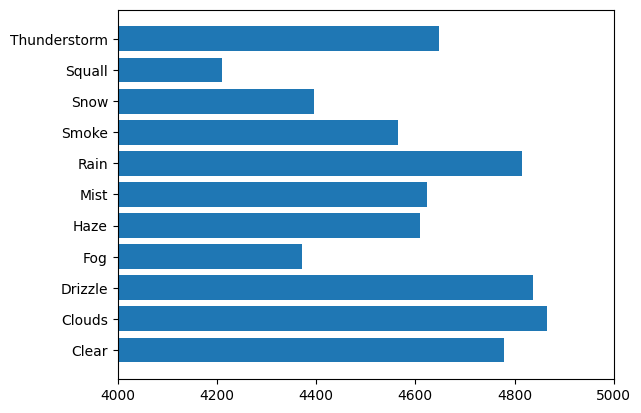

In [14]:
plt.barh(by_weather_main.index,by_weather_main['traffic_volume'])
plt.xlim([4000,5000])
plt.show()

This chart indicates there is less traffic in squall or fog. The most is seen in clouds, drizzle and rain.

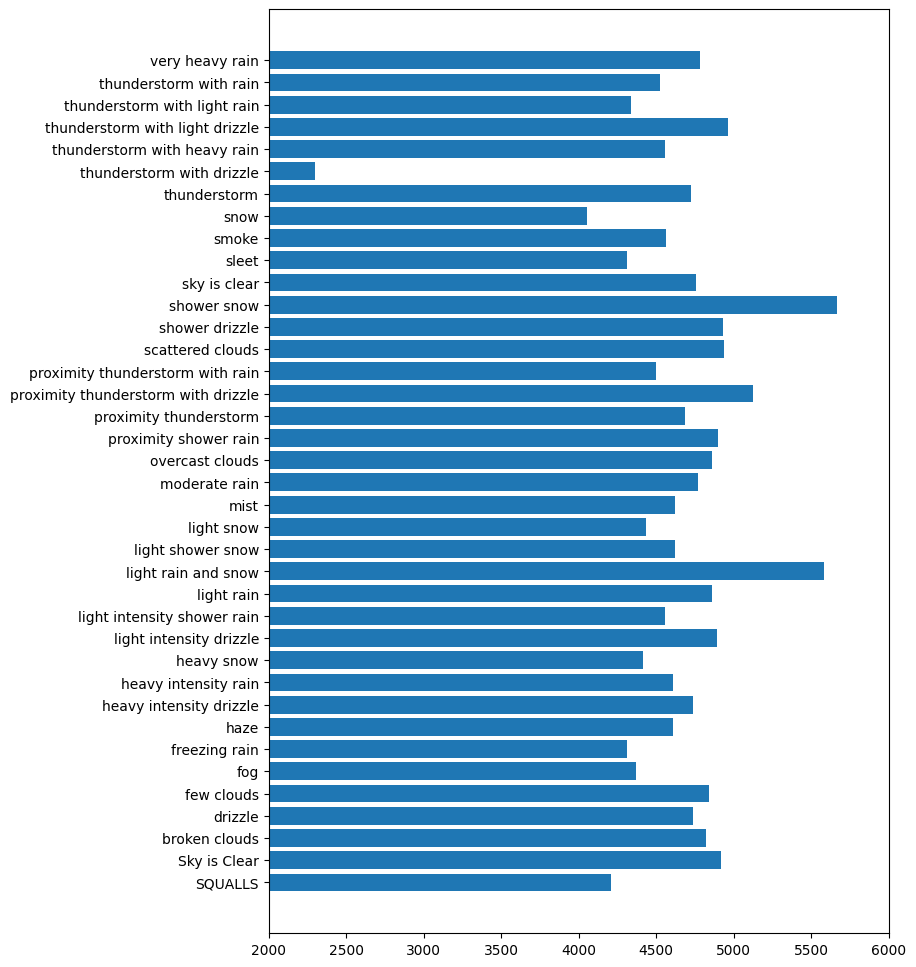

In [15]:
plt.figure(figsize=(8,12))
plt.barh(by_weather_description.index,by_weather_description['traffic_volume'])
plt.xlim([2000,6000])
plt.show()

### Weather Conclusion

Thunderstorm with drizzle has the least traffic. Which seems inconsistent, as it is significantly less than other thunderstorm or rain weathers. It may mean other factors affected traffic on that day.

The two highest traffic volumes are seen in weathers that contain snow, which could indicate that snow leads to more traffic. However this is not the case when the other weathers that have snow are examined, particularly `snow`. Also the above chart would indicate less traffic is seen in snow.

Conclusions could be drawn from `weather_main` that less traffic is seen during fog and squall and more during rain, drizzle and clouds. But conclusions may not be easily drawn from `weather_description` because of the large number of categories it is clearly being affected by other factors.